# Advanced Matplotlib Plotting Mechanics

All the basic plotting mechanisms are here. Notebook has

1. Basic Plotting
2. Figures & Axes 
4. Subplots
5. Styling and legends

Code is amended from __plotting.py__

Simple Data used for plotting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0,10,11)
b = a**4
x = np.arange(0,10)
y = 2*x

## 1) Basic Plotting

This is a jupyter specific command that makes sure plots appear in output panes

In [2]:
%matplotlib inline

Basic function to plot is plt.plot() - just basic x against y here.
##### Note - Very important on Jupyter that all calls to a specific figure or axes are located in the same cell.

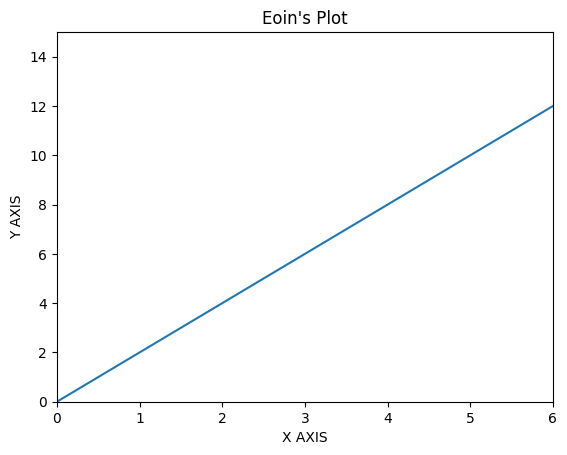

<Figure size 640x480 with 0 Axes>

In [3]:
plt.plot(x,y)

# Add a title
plt.title("Eoin's Plot")
# x and y axes named
plt.xlabel("X AXIS")
plt.ylabel("Y AXIS")
# limit what the x and y axis show. Graphs can still go beyond this but might com in useful
plt.xlim(0,6)
plt.ylim(0,15)
# In a python script we need to use plt.show for plots similar to how print works
# ie just something to have it shown to us
# Must do axes, titles etc before calling this
plt.show()

# We can save the image created down as a png or jpeg or whatever type we want
plt.savefig("myplot.png")


## 2) Figures & Axes in matplotlib


Using the figure object is the object oriented programming approach

Use plt.figure to create a blank figure object, ie a completely blank canvas. We will call the methods and attributes of the figure object to build the plot we want

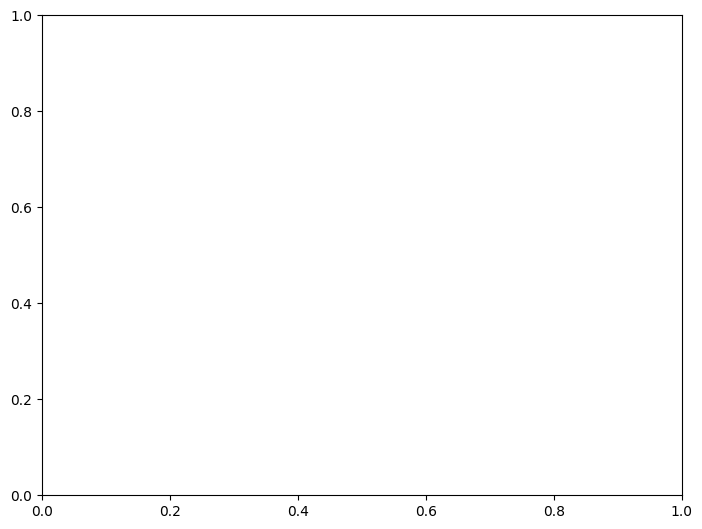

In [4]:
fig = plt.figure()
#fig = plt.figure(figsize=(10,10)) # get figsize in inches, gives us a 720x720 plot

# Add the axes we're gonna plot on. Can add as many axes as we want using the add_axes method call
axes = fig.add_axes([0,0,1,1])

In [5]:
print(f"Fig type is {type(fig)}\nAxes type is {type(axes)}")

Fig type is <class 'matplotlib.figure.Figure'>
Axes type is <class 'matplotlib.axes._axes.Axes'>


##### Note - Need to bear in mind that figure =! plot.
Our figure and our plot that goes on it are different things. The figure is the blank canvas and the plot is placed inside of that.Can think of figure as easel and plot as the painting that goes on it,might not necessarily fill it all.

So add_axes is saying where on the figure our plot should be located **add_axes([0,0,1,1])**-> bottom left point of plot goes on (0,0) of figure, and (1,1) means use all of the remaining space on x and y axis. 
(so push diagram right out to fill up to right hand side upper corner)

Best to think these args as ratios, ie (0,0)(1,1) means we're using 100% of the figure canvas, because we start at cordinate (0,0) and use a ratio of 1 for both height and width.

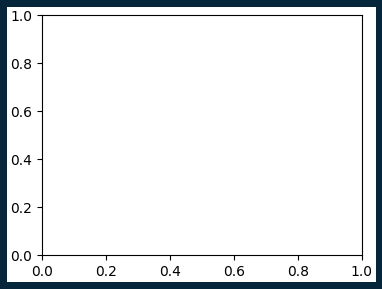

In [6]:
fig = plt.figure(linewidth=10,edgecolor="#04253a")
axes = fig.add_axes([0,0,0.5,0.5])
#axes.plot(x)

Using this we can also embed multiple plots on one figure. So could have a big plot filling the whole figure, and a subplot with axes as (0.5,0.5,1,1) which is also there. The two figure will of course be overlaid, but it's POSSIBLE - so becomes the basis for subplots. plt.subplots will handle that for us later.

We can edit some attributes of the figure we've generated

**dpi** is dots per inch, basically is the quality of the graph drawn. more dots is more visible line but go crazy and it starts taking up a lot of RAM.

**figsize** is just the size of canvas in inches, can make it huge if want

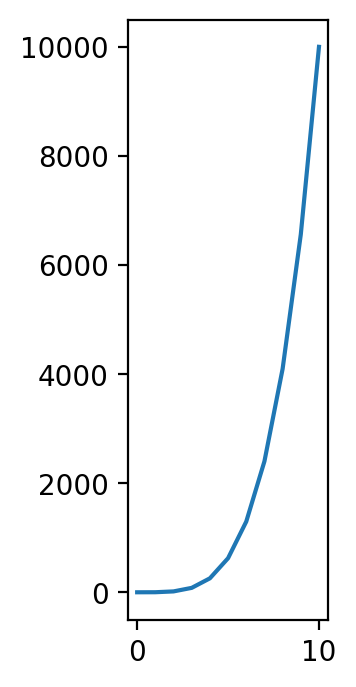

In [7]:
fig_new = plt.figure(dpi=200, figsize=(1,3)) #(1,8) makes a really tall skinny canvas,if ever wanted that
axes_new = fig_new.add_axes([0,0,1,1])

axes_new.plot(a,b)

##### Embedded Plots using multiple axes on one figure

### A small plot embedded against a large plot

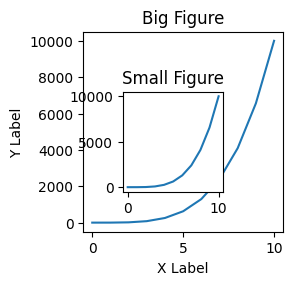

In [8]:
fig = plt.figure(figsize=(2,2))

# Add the big axes that fills whole canvas
axes1 = fig.add_axes([0, 0, 1, 1])

# Smaller axes that is within canvas but not filling it
# 0.5 ratio means we use 50% of x and y axis available after starting at (0.25,0.25)
axes2 = fig.add_axes([0.2, 0.2, 0.5, 0.5])

# Larger Figure Axes 1
axes1.plot(a, b)

# Use set_ to add to the axes figure
axes1.set_xlabel('X Label')
axes1.set_ylabel('Y Label')
axes1.set_title('Big Figure')

# Insert Figure Axes 2
axes2.plot(a,b)
axes2.set_title('Small Figure');

### A Zoomed in portion of plot

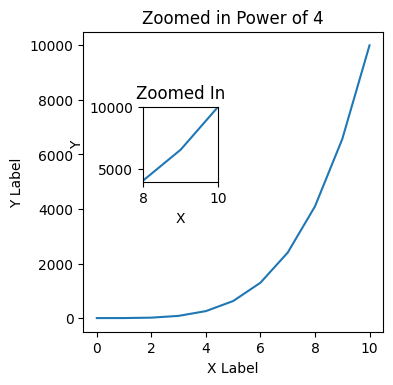

In [9]:
# Creates blank canvas
fig = plt.figure(figsize=(3,3))

axes1 = fig.add_axes([0, 0, 1, 1]) # Large figure
axes2 = fig.add_axes([0.2, 0.5, 0.25, 0.25]) # Smaller figure

# Larger Figure Axes 1
axes1.plot(a, b)

# Use set_ to add to the axes figure
axes1.set_xlabel('X Label')
axes1.set_ylabel('Y Label')
axes1.set_title('Zoomed in Power of 4')

# Insert Figure Axes 2
axes2.plot(a,b)
axes2.set_xlim(8,10)
axes2.set_ylim(4000,10000)
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('Zoomed In');

### Zoomed in Plot + additional plot extending beyond figure

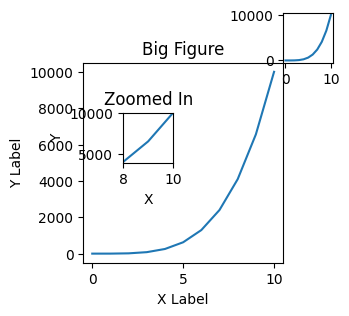

In [10]:
fig = plt.figure(figsize=(2,2))

axes1 = fig.add_axes([0, 0, 1, 1]) # Full figure
axes2 = fig.add_axes([0.2, 0.5, 0.25, 0.25]) # Smaller figure
axes3 = fig.add_axes([1, 1, 0.25, 0.25]) # Starts at top right corner!

# Larger Figure Axes 1
axes1.plot(a, b)

# Use set_ to add to the axes figure
axes1.set_xlabel('X Label')
axes1.set_ylabel('Y Label')
axes1.set_title('Big Figure')

# Insert Figure Axes 2
axes2.plot(a,b)
axes2.set_xlim(8,10)
axes2.set_ylim(4000,10000)
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('Zoomed In');

# Insert Figure Axes 3
axes3.plot(a,b)


# Save the thing as normal, add the bbox_inches because sometimes the axes don't print correctly when
# saving down
fig_new.savefig("new_figure.png",bbox_inches= "tight")


## 3) Subplots


To form a subplot, we make use of __plt.subplots__.

plt.subplots returns a tuple (figure,axes)
- a figure object, ie our canvas
- a nparray holding axes objects. The axes have been carved up into nice shapes for us, so we don't have to place them on the figure ourselves

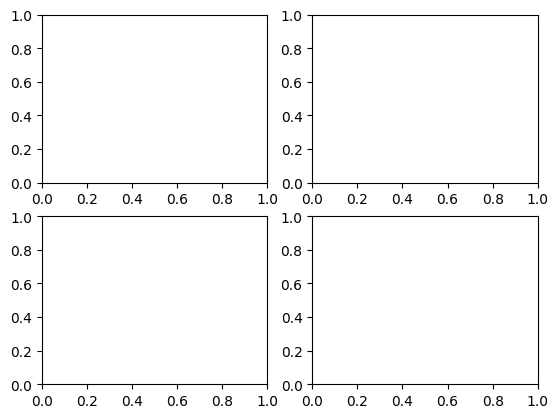

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2) # a 2x2 subplot

The axes values is what we use to designate our plots. We can choose to plot in each section individually. leaves a lot of room for looping over our axes object and plotting different plots in each cell.

When we want to draw onto a specific subplot axes/cell, we simply call the cordinate and plot as we have with individual axes before.

#### Access components of the subplot

In [12]:
print(type(axes)) # np array
print(axes.shape) # has 2 cos of our ncols
print(axes) # nparray holding the axes type objects
print(axes[0]) # can access the individual axes objects from the array and use them to plot subplots
                    # if we want to do it that way its just another axes object like the ones above,
                    # but theres a list of them generated now. They plot onto the figure canvas


<class 'numpy.ndarray'>
(2, 2)
[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:>]


#### Parameters and methods of subplots

Text(0.5, 0.98, 'SUPER TITLE')

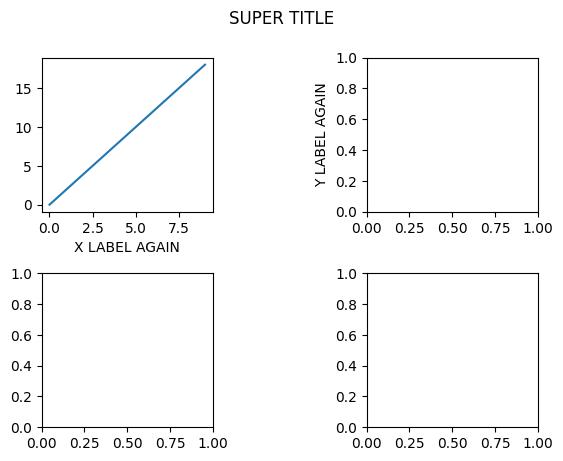

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2) # a 2x2 subplot

axes[0][0].plot(x,y) # plot in top left slot of subplot figure
#axes[1][0].plot(a,b) # plot in bottom left of subplot figure

#Useful way to make the plot neat, makes printout try to not overlap or axes labesl block each other
#plt.tight_layout()

# Another way to manually adjust the spacing between plots on the figure
# the value is the multiple of the axis, ie 0.9 times x axis used as spacing for wspace
fig.subplots_adjust(wspace=0.9, hspace=0.4)

# changing attributes works the same way
axes[0][0].set_xlabel("X LABEL AGAIN")
axes[0][1].set_ylabel("Y LABEL AGAIN")

# Can set a supertitle on the figure level as well
fig.suptitle("SUPER TITLE")

# Save it down
#fig.savefig("my_new_subplot.png", bbox_inches="tight")

## 4) Styling and Legends

It is quite easy to adjust the figure and axes to contain a legend, different line styles and fonts. 

### Adding a Legend

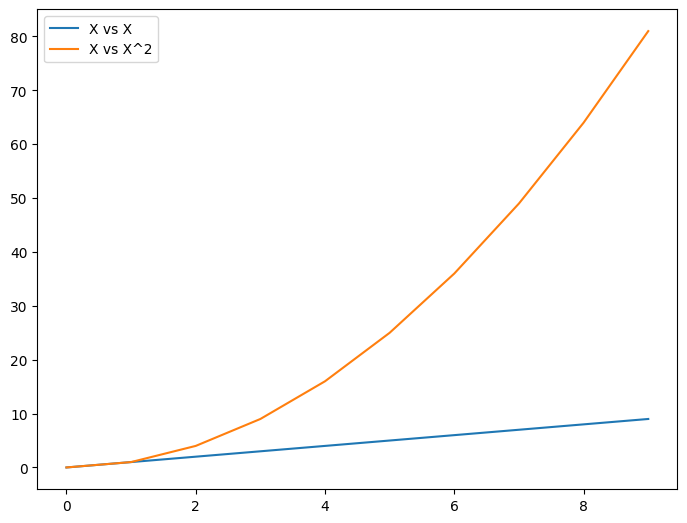

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


# plot two lines on the same plot, just use same ax twice
# associate a label with each plot that will be utilised when making a legend
ax.plot(x,x, label="X vs X")
ax.plot(x, x**2, label= "X vs X^2")

# invoke the legend just by calling the legend method
ax.legend()
#ax.legend(loc="center left") # could tell specifically where we want the legend
#ax.legend(loc=(1.1,0.5)) give a point corresponding to add_axes arg ([1.1,0.5,m,n])

### Style components

There is a huge range of tweaks we can make to the basic plotting styles. 

Most of them are outlined in python plotting documentation

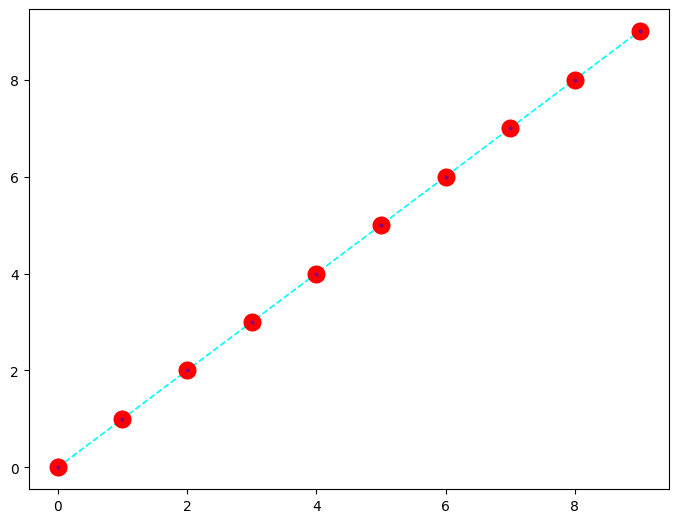

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# We can add a variety of args on plotting function to jazz it up
ax.plot(x,x,
         color='cyan',
         label="X vs X",
         lw=1.2, # line width, it's a ratio so 1.2 = x1.2 the regular thickness
         #linewidth same as lw
         ls="--", # linestyle, can make the line be a dashed line or use dots etc
         #linestyle=".-" same as ls
         marker="o", # if want to see individual points as dots on plot, as well as line eg if wanted
                    # a dashed line and dots on individual points, could do marker="o" and change
                    # ls="--". type of marker is on documentation
         ms=5, # marker size, how big the marker is, also works as markersize
         markerfacecolor="purple", # settings for the markers themselves, change the colors and effects
         markeredgewidth=8,
         markeredgecolor="red"
         )